In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

## Loading the dataset and getting a first visualization.

In [3]:
url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
# Setting the chart's configuration
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (8,5)
penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

df = pd.read_csv(url)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Getting basic information about the dataset.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None


##Handling Missing Values

In [4]:
print(df.isnull().sum())
print(f"The dataset's shape before removing the missing values was: {df.shape}")
df = df.dropna()
print(f"The dataset's shape after removing the missing values is: {df.shape}")

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
The dataset's shape before removing the missing values was: (344, 8)
The dataset's shape after removing the missing values is: (333, 8)


# Basic statistics
## Univariate Analysis:

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


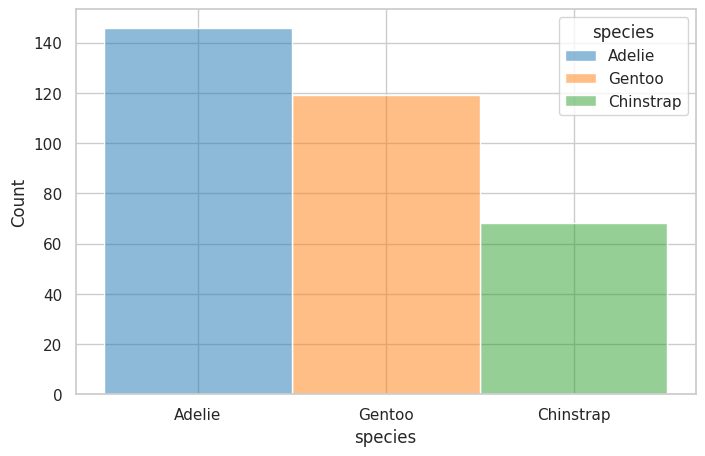

In [ ]:
print(df.species.value_counts())
sns.histplot(
    data=df,
    x='species',
    hue='species'
)
plt.show()

island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64


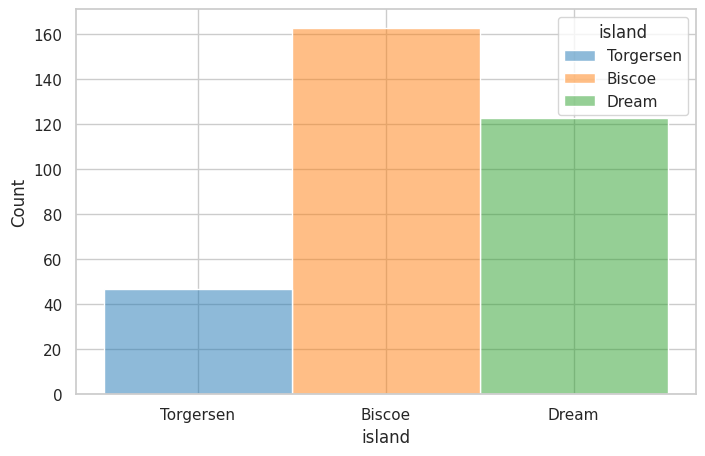

In [ ]:
print(df.island.value_counts())
sns.histplot(
    data=df,
    x = 'island',
    hue='island',
)
plt.show()

year
2009    117
2008    113
2007    103
Name: count, dtype: int64


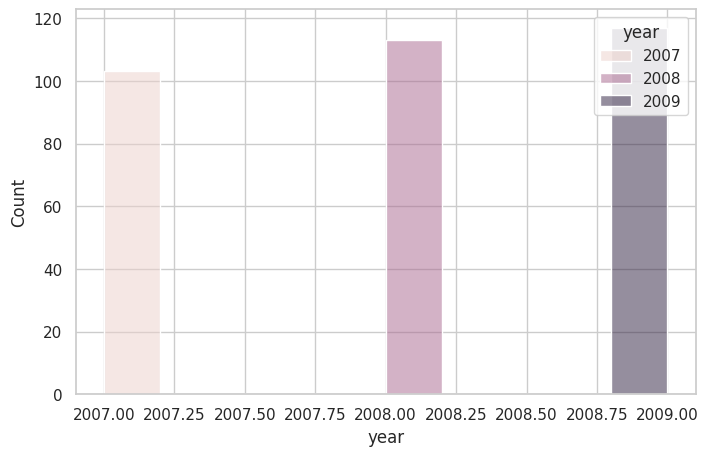

In [ ]:
print(df.year.value_counts())
sns.histplot(
    data=df,
    x='year',
    hue='year'
)
plt.show()

sex
male      168
female    165
Name: count, dtype: int64


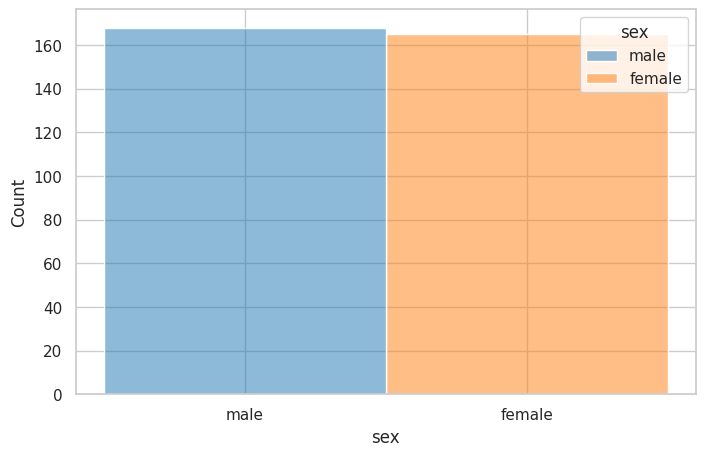

In [ ]:
print(df.sex.value_counts())
sns.histplot(
    data=df,
    x='sex',
    hue='sex')
plt.show()

In [ ]:
df.describe(
    include = 'float64'
)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


# Cuantitative variables analysis
## Bill length:

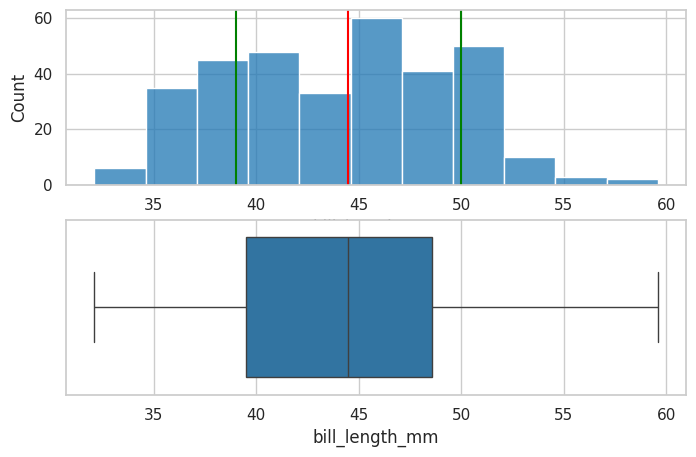

The interquantil range is: 9.100000000000001


In [5]:
x = df.bill_length_mm
plt.figure()
plt.subplot(2, 1, 1)
plt.axvline(x=x.median(),
    color='red')
plt.axvline(x=x.median() + x.std(), color='green')
plt.axvline(x=x.median() - x.std(), color='green')
sns.histplot(data=df,
    x=x)

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x=x)

plt.show()
print(f"The interquantil range is: {x.quantile(0.75) - x.quantile(0.25)}")

## Bill depth

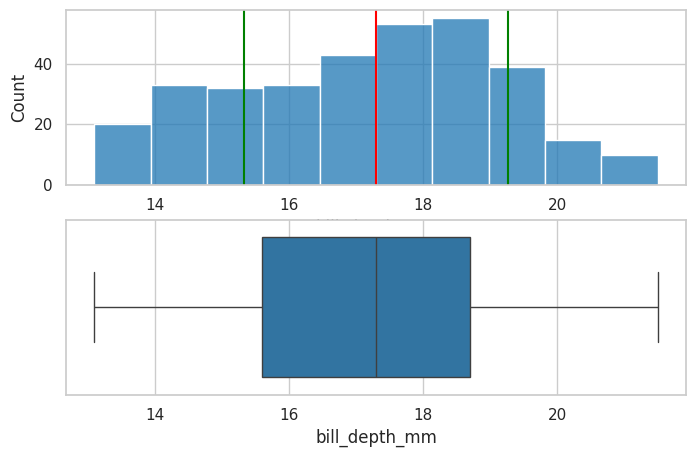

The interquantil range is: 3.0999999999999996


In [6]:

x = df.bill_depth_mm
plt.figure()
plt.subplot(2, 1, 1)
plt.axvline(x=x.median(),
    color='red')
plt.axvline(x=x.median() + x.std(), color='green')
plt.axvline(x=x.median() - x.std(), color='green')
sns.histplot(data=df,
    x=x)

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x=x)

plt.show()
print(f"The interquantil range is: {x.quantile(0.75) - x.quantile(0.25)}")

## Flipper length

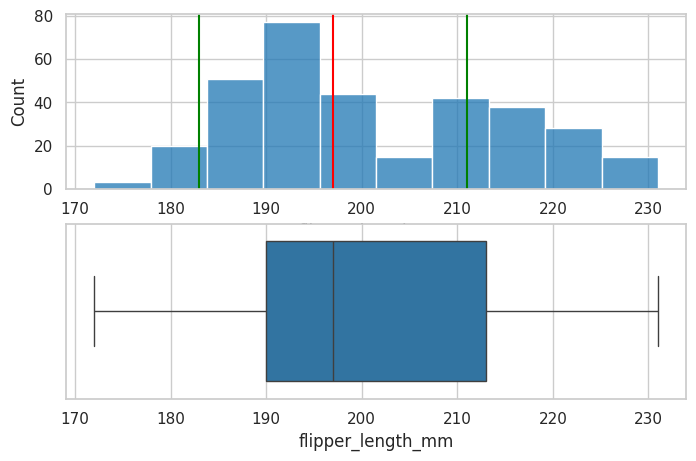

The interquantil range is: 23.0


In [7]:
x = df.flipper_length_mm
plt.figure()
plt.subplot(2, 1, 1)
plt.axvline(x=x.median(),
    color='red')
plt.axvline(x=x.median() + x.std(), color='green')
plt.axvline(x=x.median() - x.std(), color='green')
sns.histplot(data=df,
    x=x)

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x=x)

plt.show()
print(f"The interquantil range is: {x.quantile(0.75) - x.quantile(0.25)}")

## Body mass

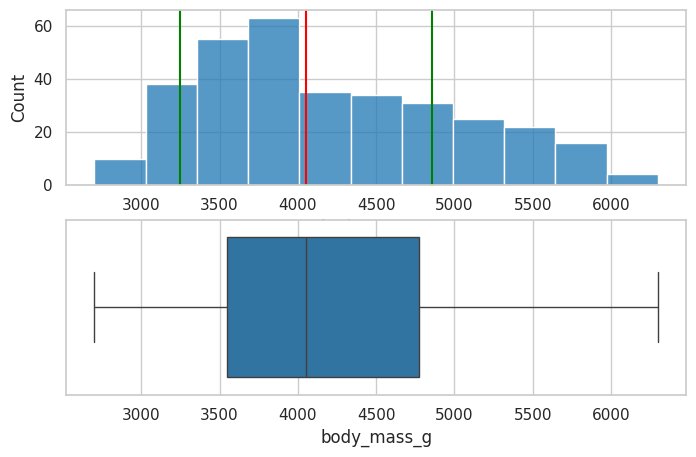

The interquantil range is: 1225.0


In [8]:
x = df.body_mass_g
plt.figure()
plt.subplot(2, 1, 1)
plt.axvline(x=x.median(),
    color='red')
plt.axvline(x=x.median() + x.std(), color='green')
plt.axvline(x=x.median() - x.std(), color='green')
sns.histplot(data=df,
    x=x)

plt.subplot(2, 1, 2)
sns.boxplot(data=df, x=x)

plt.show()
print(f"The interquantil range is: {x.quantile(0.75) - x.quantile(0.25)}")

# Bivariate analysis:
## Relationships between variables

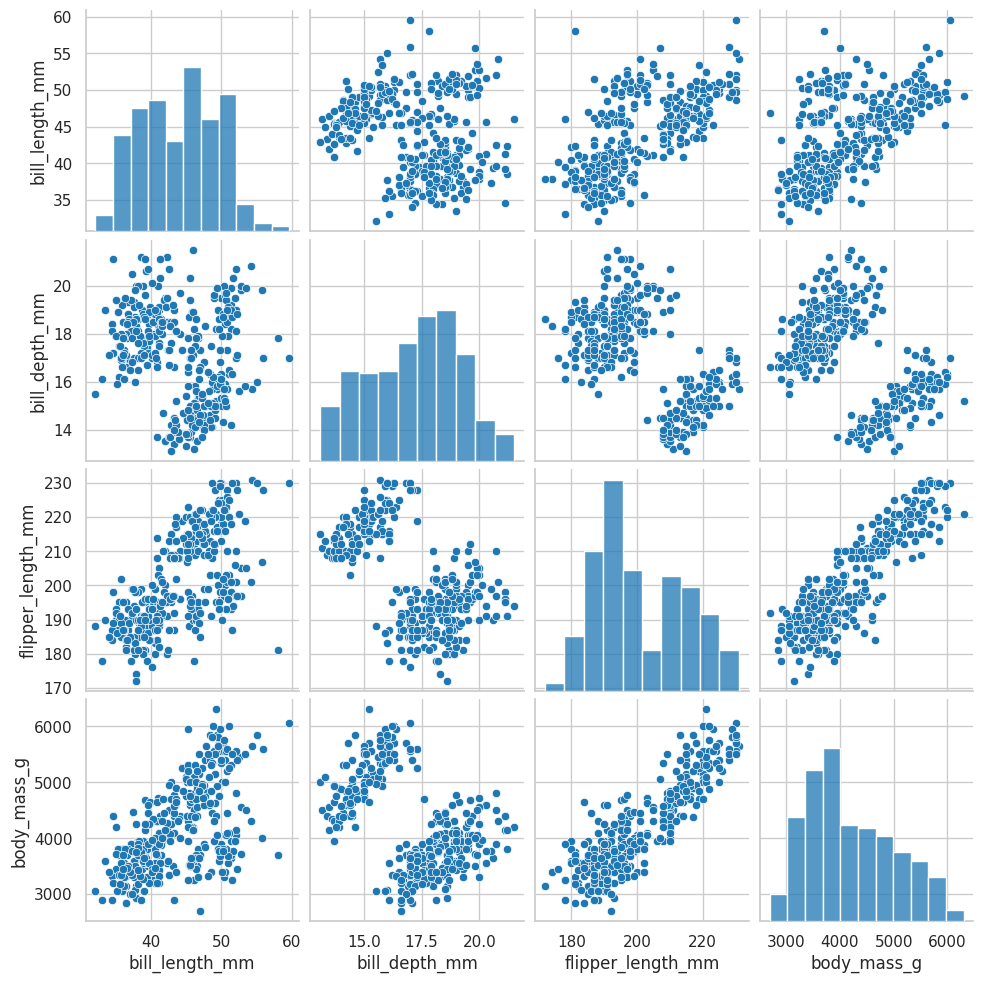

In [9]:
numerical_df = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
sns.pairplot(
    data=numerical_df
)

## Correlationship Matrix

In [10]:
numerical_df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


## Regression Analysis
### Flipper length Vs Body mass

LinregressResult(slope=50.153265942241134, intercept=-5872.092682842826, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=1.540230983824635, intercept_stderr=310.2851553513499)
LinregressResult(slope=0.015195264815217668, intercept=137.03962089225467, rvalue=0.8729788985653613, pvalue=3.1328362509719978e-105, stderr=0.00046665391049053467, intercept_stderr=1.9987694290243143)


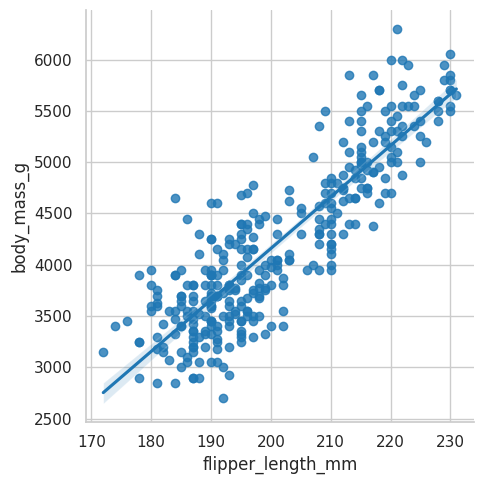

In [11]:
x = df.flipper_length_mm
y = df.body_mass_g
fl_bm_regression = scipy.stats.linregress(
    x=x,
    y=y
)
bm_fl_regression = scipy.stats.linregress(
    x=y,
    y=x
)

print(fl_bm_regression, bm_fl_regression, sep="\n")

sns.lmplot(
    data=df,
    x='flipper_length_mm',
    y='body_mass_g',
)
plt.show()

## Flipper length Vs Bill length

LinregressResult(slope=0.25482471848215255, intercept=-7.21855798877661, rvalue=0.6530956386670862, pvalue=7.211340708096522e-42, stderr=0.016240696205560887, intercept_stderr=3.2717475483081753)
LinregressResult(slope=1.6738325692522753, intercept=127.33039757802362, rvalue=0.6530956386670862, pvalue=7.211340708096522e-42, stderr=0.10667805862053212, intercept_stderr=4.729078577188444)


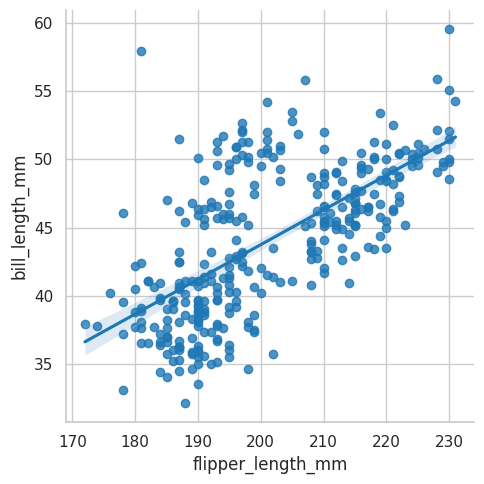

In [12]:
x = df.flipper_length_mm
y = df.bill_length_mm

fl_bl_regression = scipy.stats.linregress(
    x = x,
    y = y
)
bl_fl_regression = scipy.stats.linregress(
    x = y,
    y = x
)
print(fl_bl_regression, bl_fl_regression, sep="\n")
sns.lmplot(
    data=df,
    x='flipper_length_mm',
    y='bill_length_mm'
)
plt.show()

## Bill depth Vs Bill length

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443438e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443438e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


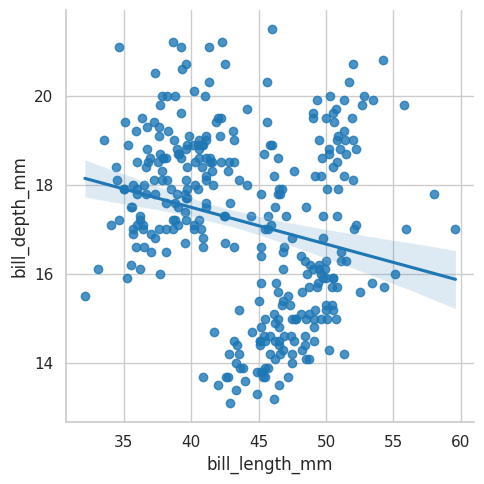

In [13]:
x = df.bill_length_mm
y = df.bill_depth_mm

bl_bd_regression = scipy.stats.linregress(
    x = x,
    y = y
)
bd_bl_regression = scipy.stats.linregress(
    x = y,
    y = x
)
print(bl_bd_regression, bd_bl_regression, sep="\n")
sns.lmplot(
    data = df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm'
)
plt.show()

## Multivariate Analysis
## Pairplot clasified by species

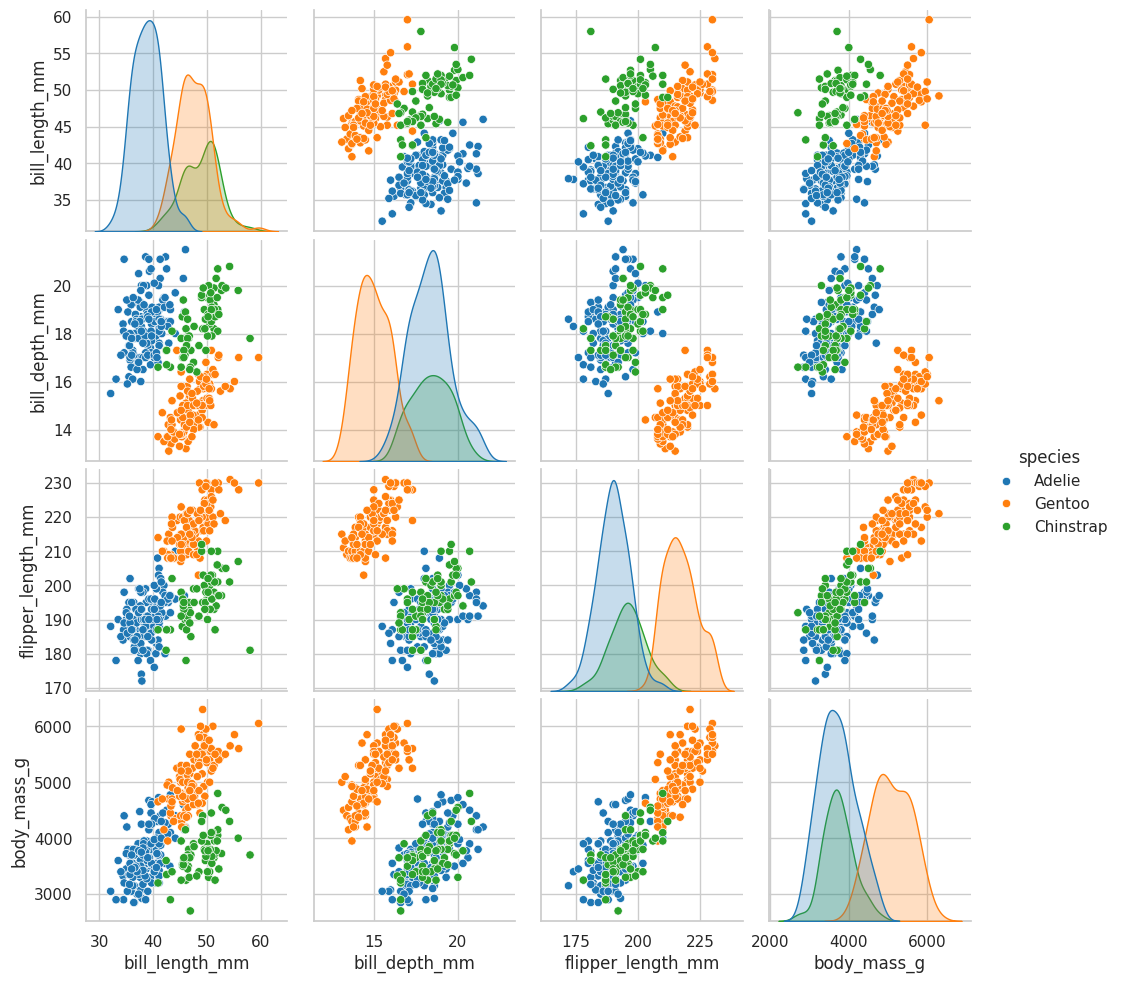

In [14]:
sns.pairplot(
    data = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','species']],
    hue = 'species'
)

## Linear Regression Analysis to determine the body mass

In [24]:
simple_lr_model = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + C(sex)",
        data = df
        )
        .fit()
)

simple_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Sun, 01 Sep 2024   Prob (F-statistic):          3.53e-118
Time:                        09:15:09   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualizing Results

In [25]:
models_results = pd.DataFrame(
    dict(
        actual_value=df.body_mass_g,
        prediction = simple_lr_model.predict(),
        species=df.species,
        sex=df.sex
    )
)

models_results

,actual_value,prediction,species,sex
0,3750.0,3441.323750,Adelie,male
1,3800.0,3328.384372,Adelie,female
2,3250.0,3751.223949,Adelie,female
4,3450.0,3657.259599,Adelie,female
5,3650.0,3864.163327,Adelie,male
...,...,...,...,...
339,4000.0,4662.860306,Chinstrap,male
340,3400.0,4080.099176,Chinstrap,female
341,3775.0,4005.109853,Chinstrap,male
342,4100.0,4803.806832,Chinstrap,male


<Axes: ylabel='Proportion'>

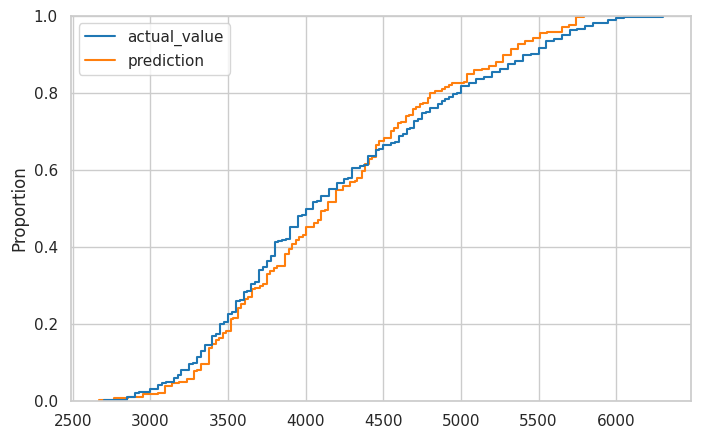

In [26]:
sns.ecdfplot(
    data=models_results #.select_columns(['actual_value', 'simple_lr_model'])
)

## Applying one-hot encoding to categorical variables

In [15]:
df_encoded = pd.get_dummies(
    df,
    columns = ['sex','species','island'])
df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,2007,False,True,True,False,False,False,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,True,False,False,False,False,True
2,40.3,18.0,195.0,3250.0,2007,True,False,True,False,False,False,False,True
4,36.7,19.3,193.0,3450.0,2007,True,False,True,False,False,False,False,True
5,39.3,20.6,190.0,3650.0,2007,False,True,True,False,False,False,False,True


## Applying MinMaxScaler to numerical variables

In [16]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_encoded)
preprocessed_df = pd.DataFrame(scaled_data, columns=df_encoded.columns)
preprocessed_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,0.254545,0.666667,0.152542,0.291667,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.298182,0.583333,0.389831,0.152778,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.167273,0.738095,0.355932,0.208333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.261818,0.892857,0.305085,0.263889,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


## Visualizing relationships between variables

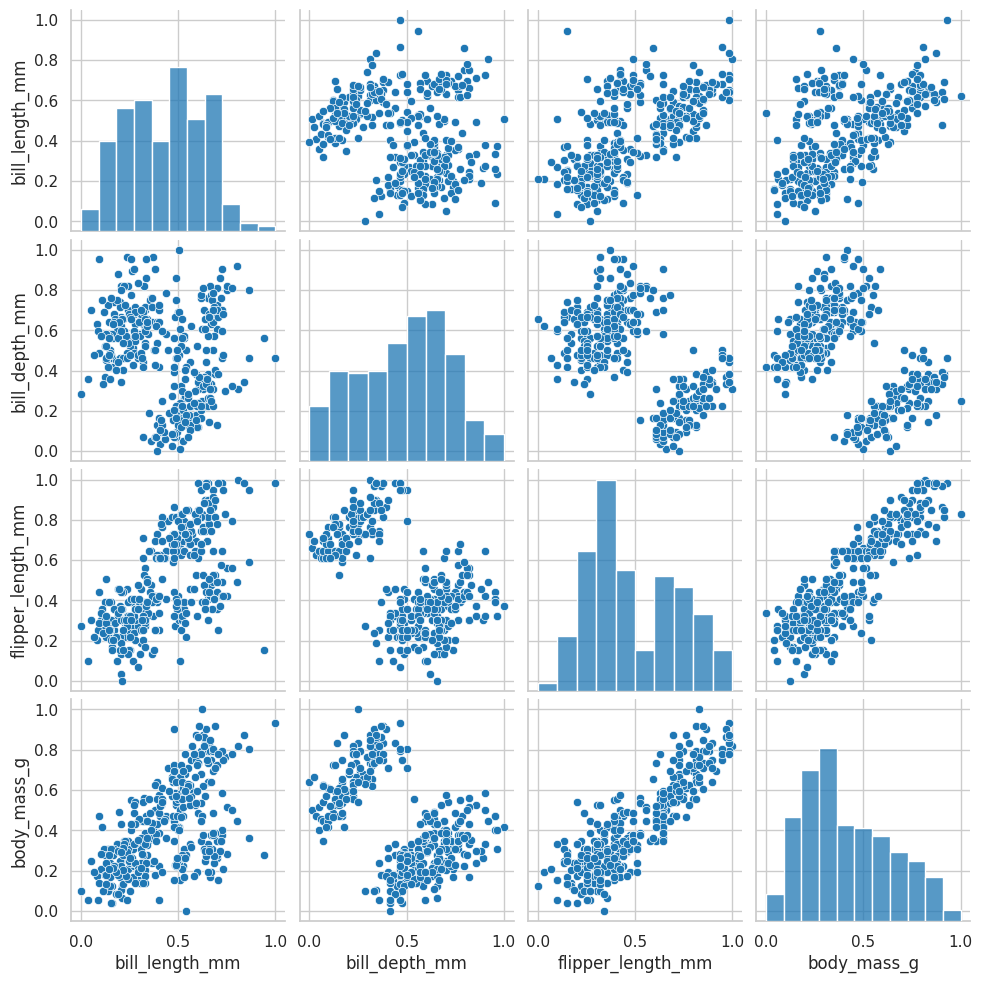

In [17]:
sns.pairplot(
    data=preprocessed_df[
        ['bill_length_mm',
         'bill_depth_mm',
         'flipper_length_mm',
         'body_mass_g']
        ]
)

## Getting the coorelationship matrix

In [18]:
preprocessed_df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000
